## Comparison of E-OBS and ERA-5 data

In [1]:
# necessary imports
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
from local_paths import eobsPath, era5Path

Get data of absolute difference between the daily maximum temperature given by E-OBS and ERA-5, for Warsaw and Madrid. 

In [4]:
ds_difference_madrid = xr.open_dataset("data/difference_era5_eobs_Madrid.nc")
ds_difference_warsaw = xr.open_dataset("data/difference_era5_eobs_Warsaw.nc")

We then do some simple formatting of this data, by selecting a time frame for which both sets of data contain measurements and then extracting the values for the 15th of June each year. 

In [5]:
# slice for dates where you have observations for both sets of data
ds_difference_warsaw = ds_difference_warsaw.sel(time = slice("1990-01-01", "2020-05-15"))
ds_difference_madrid = ds_difference_madrid.sel(time = slice("1990-01-01", "2020-05-15"))

june15ths = pd.to_datetime(["{}-06-15".format(year) for year in range(1990, 2020)])

ds_difference_june15_madrid = ds_difference_madrid.sel(time=june15ths)
ds_difference_june15_warsaw = ds_difference_warsaw.sel(time=june15ths)

We begin by plotting the difference in gridplots, for each 15th of June each year. 

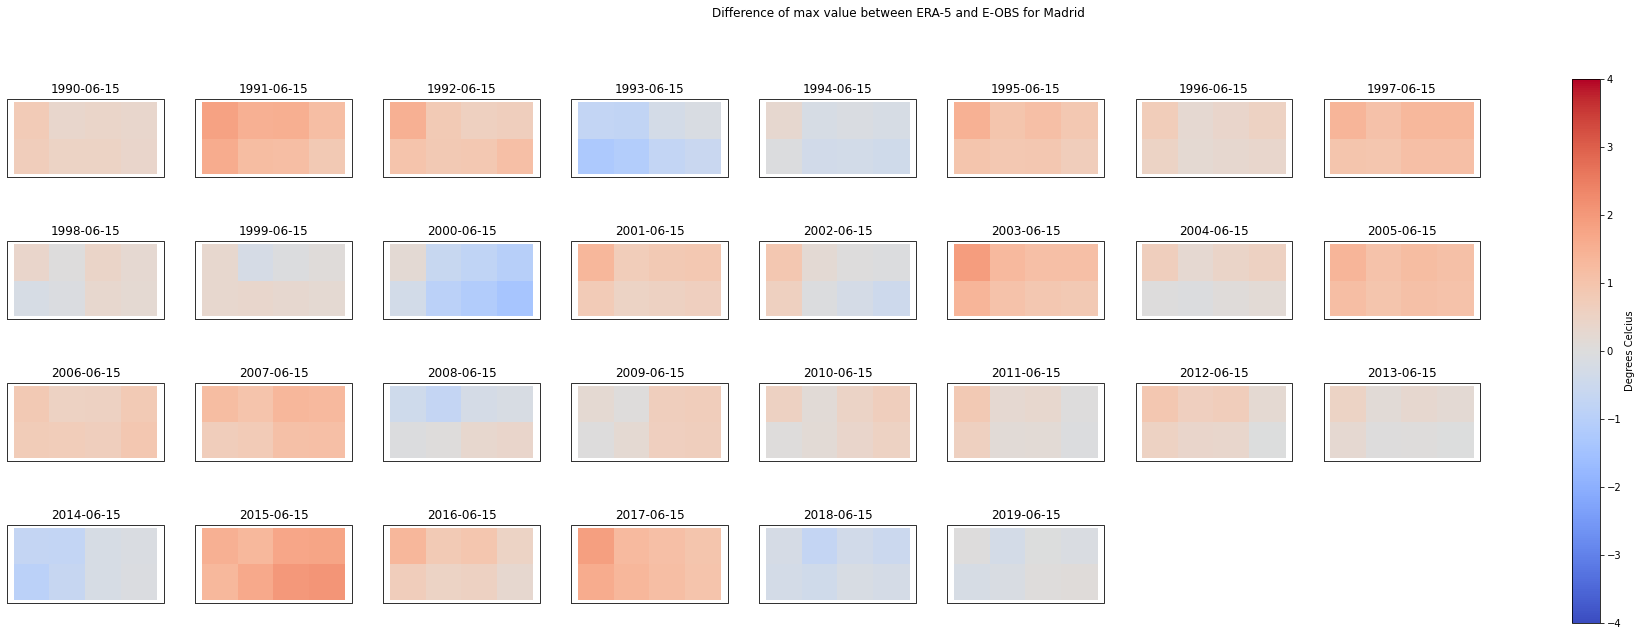

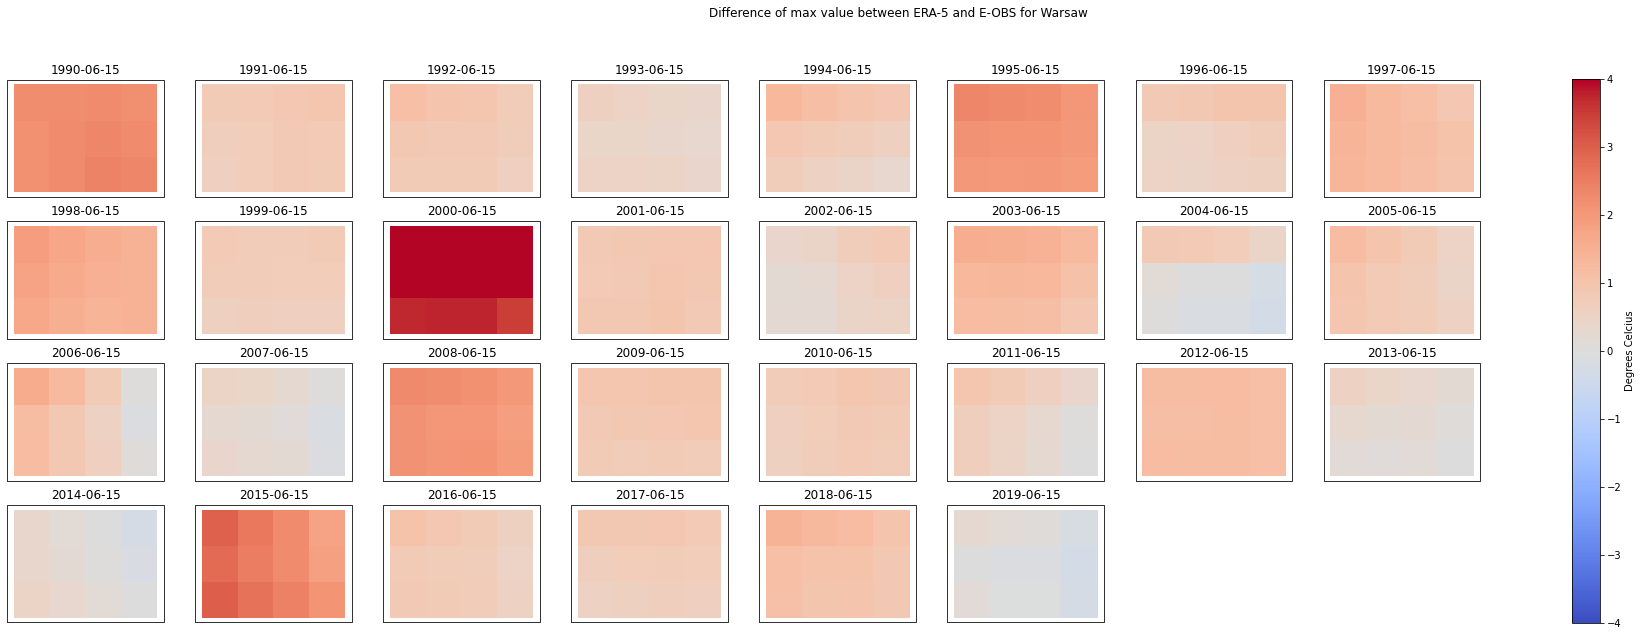

In [9]:
fig, axes = plt.subplots(nrows = 4, ncols = 8, subplot_kw = {"projection" : ccrs.PlateCarree()}, sharey = True,
                         figsize = (33,10))

fig.delaxes(axes[3,7])  # delete last axis, since we want uneven number
fig.delaxes(axes[3,6])

for i, ax in enumerate(axes.flat[:-2]):
    one_plot = ds_difference_june15_madrid.isel(time = i)["tx"].plot(ax = ax, transform = ccrs.PlateCarree(),
                                                                     add_colorbar = False, cmap = "coolwarm", vmin=-4, vmax=4)
    ax.set_title(pd.to_datetime(ds_difference_june15_madrid["time"][i].values).date())
    if i == 15:
        colorbar_plot = one_plot
    # Possibly add city lines here

fig.colorbar(colorbar_plot, ax = axes[:,:], location = "right", label = "Degrees Celcius")
fig.suptitle("Difference of max value between ERA-5 and E-OBS for Madrid")


plt.savefig("data/difference_june15_madrid.png")
plt.show()

# Warsaw

fig, axes = plt.subplots(nrows = 4, ncols = 8, subplot_kw = {"projection" : ccrs.PlateCarree()}, sharey = True,
                         figsize = (33,10))

fig.delaxes(axes[3,7])  # delete last axis, since we want uneven number
fig.delaxes(axes[3,6])

for i, ax in enumerate(axes.flat[:-2]):
    one_plot = ds_difference_june15_warsaw.isel(time = i)["tx"].plot(ax = ax, transform = ccrs.PlateCarree(),
                                                                     add_colorbar = False, cmap = "coolwarm", vmin=-4, vmax=4)
    ax.set_title(pd.to_datetime(ds_difference_june15_warsaw["time"][i].values).date())
    if i == 15:
        colorbar_plot = one_plot
    # Possibly add city lines here

fig.colorbar(colorbar_plot, ax = axes[:,:], location = "right", label = "Degrees Celcius")
fig.suptitle("Difference of max value between ERA-5 and E-OBS for Warsaw")

plt.savefig("data/difference_june15_warsaw.png")
plt.show()

We now plot the same data as a time series

In [10]:
# nice blue colors
shades_of_blue = ('aquamarine', 'turquoise', 'lightseagreen', 'teal', 'cadetblue', 'powderblue', 'deepskyblue', 'lightskyblue', 'steelblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'mediumslateblue')

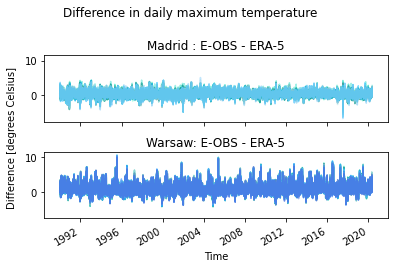

In [15]:
fig, (ax_madrid, ax_warsaw) = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True)

counter = 0
for lon in range(ds_difference_warsaw.dims.get('longitude')):
    for lat in range(ds_difference_warsaw.dims.get('latitude')):
        ds_difference_warsaw.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_warsaw, color = shades_of_blue[counter], alpha = 0.5)
        counter += 1

counter = 0
for lon in range(ds_difference_madrid.dims.get('longitude')):
    for lat in range(ds_difference_madrid.dims.get('latitude')):
        ds_difference_madrid.isel(longitude = lon, latitude = lat)["tx"].plot(
            ax = ax_madrid, color = shades_of_blue[counter], alpha = 0.5)
        counter += 1

ax_madrid.set_title("Madrid : E-OBS - ERA-5")
ax_madrid.set_ylabel("")
ax_madrid.set_xlabel("")

ax_warsaw.set_title("Warsaw: E-OBS - ERA-5")
ax_warsaw.set_ylabel("")
ax_warsaw.set_xlabel("Time")

# add framing axis for common y-label
fig.add_subplot(111, frame_on = False)
plt.tick_params(labelcolor="none", bottom = False, left = False)
plt.ylabel("Difference [degrees Celsius]")

plt.suptitle("Difference in daily maximum temperature")

plt.tight_layout()

plt.savefig("data/difference_time_series.png")
plt.show()
